<a href="https://colab.research.google.com/github/Arpitsyal/a_learner/blob/main/predictive_ML_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **L01. Demonstrate the understanding of basic concepts of dealing with the different types of data ordinal, categorical, encoding along with collecting, storing and making it ready for processing.**

**Tasks**

1. Suppose you are training a decision tree algorithm to determine whether to buy a specific wine
product. Each wine is characterized by four attributes that can take different values according to
the following table: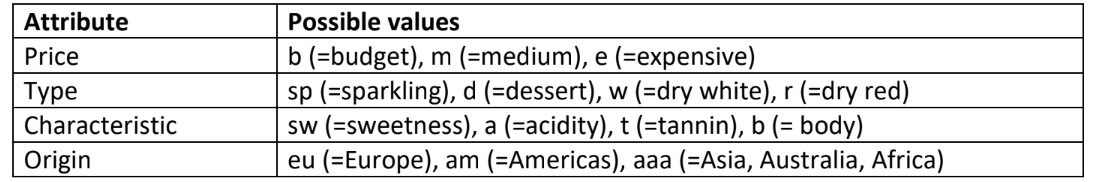

INTRODUCTION TO INFORMATION THEORY:


In machine learning, decision trees are used to classify cases by sorting the tree down from the root to a leaf node. Every node in the tree denotes a test of an instance attribute, and every descending branch


Claude Shannon, an American mathematician and engineer, is mostly credited with developing the idea of entropy in machine learning.In his groundbreaking work "A Mathematical Theory of Communication" from 1948, Shannon presented the idea of "information entropy" as a way to measure the degree of information, surprise, or uncertainty in a batch of data.Important information on the source of entropy in machine learningDefinition: Shannon entropy (\(H=-\sum p_{i}\log p_{i}\)) quantifies a random variable's unpredictability and is used in machine learning activities such as decision tree construction (Information Gain) to assess the purity of a node.

In [2]:
import pandas as pd
import numpy as np

Attribute           Possible values
Price               b (=budget), m (=medium), e (=expensive)
Type                sp (=sparkling), d (=dessert), w (=dry white), r (=dry red)
Characteristic     sw (=sweetness), a (=acidity), t (=tannin), b (= body)
Origin             eu (=Europe), am (=Americas), aaa (=Asia, Australia, Africa)

In [3]:
#writing data as dictionary
data={
    'Wine #':[1,2,3,4,5,6,7,8,9,10],
    'Price':['m','e','e','m','m','m','e','b','b','m'],
    'Type':['w','d','d','w','w','d','sp','r','d','d'],
    'Characteristic':['a','t','a','sw','sw','t','a','t','a','b'],
    'Origin':['aaa','am','am','am','eu','eu','aaa','eu','aaa','aaa'],
    'Decision':['to buy','to buy','to buy','to buy','to buy','not to buy','not to buy','not to buy','not to buy','not to buy']
}

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,Wine #,Price,Type,Characteristic,Origin,Decision
0,1,m,w,a,aaa,to buy
1,2,e,d,t,am,to buy
2,3,e,d,a,am,to buy
3,4,m,w,sw,am,to buy
4,5,m,w,sw,eu,to buy


In [6]:
df

,Wine #,Price,Type,Characteristic,Origin,Decision
0,1,m,w,a,aaa,to buy
1,2,e,d,t,am,to buy
2,3,e,d,a,am,to buy
3,4,m,w,sw,am,to buy
4,5,m,w,sw,eu,to buy
5,6,m,d,t,eu,not to buy
6,7,e,sp,a,aaa,not to buy
7,8,b,r,t,eu,not to buy
8,9,b,d,a,aaa,not to buy
9,10,m,d,b,aaa,not to buy



if an event or anything have equal chances of occuring i.e. 50/50 then entropy would be 1

*   Information Gain


Mathematical Framework



*   **Entropy** measures uncertaininty , disorder or randomness in a dataset (high entropy = high disorder, low entropy = low disorder)
for example when we flip a coin if outcome is uncertain then it means entropy is high if its certain then entropy is low
In order to define information gain precisely, we begin by defining a measure commonly used in information theory, called entropy, that characterizes the (im)purity
of an arbitrary collection of examples. Given a collection S, containing positive
and negative examples of some target concept, the entropy of S relative to this
boolean classification is
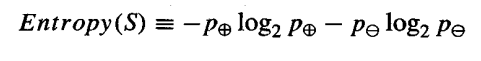


*  **Information Gain**: According to Mitchell (1997), Information Gain is the principal metric for determining the relevance of an attribute in a Decision Tree. The decrease in entropy achieved by splitting the data on a particular feature. It tells you how much knowledge you gain about the target variable by knowing the value of that feature.
Given entropy as a measure of the impurity in a collection of training examples,
we can now define a measure of the effectiveness of an attribute in classifying
the training data. The measure we will use, called information gain, is simply the
expected reduction in entropy caused by partitioning the examples according to
this attribute. More precisely, the information gain, Gain(S, A) of an attribute A,
relative to a collection of examples S, is defined as
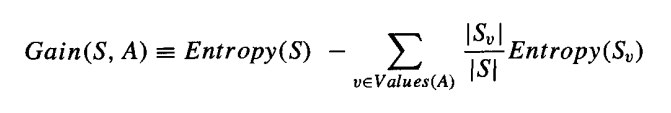

I WILL CALCULATE ENTROPY NOW

I have defined a function get_entropy which will take values in form of labels
if length of labels is 0 then it means dataset is empty i.e. no randomness

then I caluclate probability by using pandas function it will calculate probability i.e. is pi
I normalize it in between 0 and 1 so instead of value counts providing me with count it will return me values between 0 and 1

in the formula log 0 is undefined i.e. infinity if any class is 0 times then it will give error so i have added 1e-9 (a very small value) to prevent it doing so (its calles epsilon or smoothing)

In [7]:
def get_entropy(labels):
  if len(labels)==0:
    return 0
  probs=labels.value_counts(normalize=True)
  return -np.sum(probs*np.log2(probs + 1e-9))

In [8]:
get_entropy(df['Decision'])

np.float64(0.99999999711461)

Below is step by step calculation when  we split attribute what was the info gain

In [9]:
def calculate_split_info(df,feature,target):
  print(f"Calculating split for feature: {feature}")
  #step 1: parent entropy
  parent_entropy=get_entropy(df[target])
  print(f"parent entropy {parent_entropy}")
  #step 2: child entropies
  values=df[feature].unique()
  weighted_entropy=0
  total_rows=len(df)
  print(f"breakdown by branch")
  for val in values:
    subset=df[df[feature]==val][target]
    entropy=get_entropy(subset)
    weight=len(subset)/total_rows
    weighted_entropy+=weight*entropy
    print(f"- Value'{val}': {len(subset)} rows, Entropy = {entropy:.4f}")
  #step 3 info gain
  info_gain=parent_entropy-weighted_entropy
  print(f"weighted entropy {weighted_entropy:.4f}")
  print(f"info gain {info_gain:.4f}")
  print("-"*40)
  return info_gain

#run the function
gain=calculate_split_info(df,'Type','Decision')

Calculating split for feature: Type
parent entropy 0.99999999711461
breakdown by branch
- Value'w': 3 rows, Entropy = -0.0000
- Value'd': 5 rows, Entropy = 0.9710
- Value'sp': 1 rows, Entropy = -0.0000
- Value'r': 1 rows, Entropy = -0.0000
weighted entropy 0.4855
info gain 0.5145
----------------------------------------


1. What is the entropy of the parent data in the context of this classification?


   - Decision column is the parent column and its entropy is 0.999999




2. What is the information gain for splitting on attribute ‘Type’? Show the steps in your
calculation.

   - Calculation shown in the code , info gain is 0.5145, when we split for type feature entropy was 0.9710 because all other values were pure but d i.e. dessert was not pure so we chose it to further check for the purity

In [10]:
df_clean=df.drop(columns=['Wine #'])

WIne column was having high cardinality it means all its values were unique, due to its unique values entropy of this attribute was too high i.e. near about 1 so this column just of no use it will confuse model

High Cardinality can poses challenges in database and monitoring systems by increasing storages,processing demand, querying complexity, potentially slowing down systems and reaming costs

which causes overfitting i.e. model will run all the datapoints and will result in 100% accuracy which will make model to underperform on new data/ unseen data

In [11]:
#calculate info gain of all attributes
gains={}
for f in df_clean.columns:
  gains[f]=calculate_split_info(df_clean,f,'Decision')

#split the best feature
best_feature=max(gains,key=gains.get)
print(f"best info gain' {best_feature} next split would be on this" )

Calculating split for feature: Price
parent entropy 0.99999999711461
breakdown by branch
- Value'm': 5 rows, Entropy = 0.9710
- Value'e': 3 rows, Entropy = 0.9183
- Value'b': 2 rows, Entropy = -0.0000
weighted entropy 0.7610
info gain 0.2390
----------------------------------------
Calculating split for feature: Type
parent entropy 0.99999999711461
breakdown by branch
- Value'w': 3 rows, Entropy = -0.0000
- Value'd': 5 rows, Entropy = 0.9710
- Value'sp': 1 rows, Entropy = -0.0000
- Value'r': 1 rows, Entropy = -0.0000
weighted entropy 0.4855
info gain 0.5145
----------------------------------------
Calculating split for feature: Characteristic
parent entropy 0.99999999711461
breakdown by branch
- Value'a': 4 rows, Entropy = 1.0000
- Value't': 3 rows, Entropy = 0.9183
- Value'sw': 2 rows, Entropy = -0.0000
- Value'b': 1 rows, Entropy = -0.0000
weighted entropy 0.6755
info gain 0.3245
----------------------------------------
Calculating split for feature: Origin
parent entropy 0.999999997

In [12]:
remaining_features = ['Price', 'Characteristic', 'Origin']
target = 'Decision'

In [13]:
# Filter only 'd' type rows
df_dry = df_clean[df_clean['Type'] == 'd']
print(df_dry)

  Price Type Characteristic Origin    Decision
1     e    d              t     am      to buy
2     e    d              a     am      to buy
5     m    d              t     eu  not to buy
8     b    d              a    aaa  not to buy
9     m    d              b    aaa  not to buy


type attribute is selected because of its high info gain , if we have to choose which other features would be suitable after type attribute we would do so by building a function that wiuld calculate info gains / entropy within the columns

In [14]:
print("calculating next split for dry d branch")
branch_gains={}
for f in remaining_features:
  gain=calculate_split_info(df_dry,f,'Decision')
  branch_gains[f]=gain
next_winner=max(branch_gains,key=branch_gains.get)
print(f"type == d next winner {next_winner} will be")

calculating next split for dry d branch
Calculating split for feature: Price
parent entropy 0.9709505915692787
breakdown by branch
- Value'e': 2 rows, Entropy = -0.0000
- Value'm': 2 rows, Entropy = -0.0000
- Value'b': 1 rows, Entropy = -0.0000
weighted entropy -0.0000
info gain 0.9710
----------------------------------------
Calculating split for feature: Characteristic
parent entropy 0.9709505915692787
breakdown by branch
- Value't': 2 rows, Entropy = 1.0000
- Value'a': 2 rows, Entropy = 1.0000
- Value'b': 1 rows, Entropy = -0.0000
weighted entropy 0.8000
info gain 0.1710
----------------------------------------
Calculating split for feature: Origin
parent entropy 0.9709505915692787
breakdown by branch
- Value'am': 2 rows, Entropy = -0.0000
- Value'eu': 1 rows, Entropy = -0.0000
- Value'aaa': 2 rows, Entropy = -0.0000
weighted entropy -0.0000
info gain 0.9710
----------------------------------------
type == d next winner Price will be




3. If ‘Type’ is the first attribute selected for building a decision tree, what would be the next one?
Is this answer unique, or could another attribute be selected instead? Justify your answer.

   - "both price and origin provide the same information gain, i have choosen price for next split because if we apply business logic decision to buy a wine or not depends on price more than origin if i have achieved tree as origin tree would still achieve 100% accuracy but in terms of business point of view if we usually buy a product , prediction whether to buy a product or not depends mostly on the price of the product not on country of origin so which makes price column to be on higher list"

   

other attribute have feature entropy because it has more than 2 categories , target column i.e Decision  has 2 categories so its entropy is 1.0

**In-text citation**:

 According to Mitchell (1997), Information Gain is the principal metric for determining the relevance of an attribute in a Decision Tree.

**Refrencing**

"Classification and Regression Trees" (1984) by Leo Breiman, Jerome Friedman, Richard Olshen, and Charles Stone.
"The Mathematical Theory of Communication" by Claude E. Shannon and Warren Weaver (1949).
Mitchell, T. M. (1997). Machine Learning. New York: McGraw-Hill.

# **LO2. Explain the various components of predictive analytics, with the models for regression, classification and clustering to analyse real life business problems**

2) K means clustering to perform segmentation

Introduction:

* Definition: Segmentation means to divide data into clusters each cluster have data points which are similar to each other so that dissimilar data points are in another clusters. Kmeans clustering is best for segmentation

* Importance:
In Business it is used to tailor market stratergies. Divide broad markets into customer groups so that they can be advertised products with personalised market segmentation , understand customer needs and gain competitive edge.

* Objective:
i will try to find clusters with the help of dataset given, try to divide these datapoints into clusters and gather insights with the help of numerical features.

In [15]:
import pandas as pd
import numpy as np

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
from sklearn.decomposition import PCA

In [19]:
import ast, re

In [20]:
from google.colab import files
uploaded=files.upload()

Saving Task2_Data_Clustering.txt to Task2_Data_Clustering.txt


In [21]:
with open('Task2_Data_Clustering.txt','r',encoding='utf-8') as f:
  lines=f.read()
print(lines)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
df2=pd.read_csv('Task2_Data_Clustering.txt',header=None)

In [23]:
df2.head()

,0,1,2,3,4
0,array([[5.1,3.5,1.4,0.2],NaN
1,[4.9,3.0,1.4,0.2],NaN
2,[4.7,3.2,1.3,0.2],NaN
3,[4.6,3.1,1.5,0.2],NaN
4,[5.,3.6,1.4,0.2],NaN


In [24]:
df2.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,150


In [25]:
df2.shape

(150, 5)

In [26]:
df2=df2.drop(columns=[4])

In [27]:
df2.head()

,0,1,2,3
0,array([[5.1,3.5,1.4,0.2]
1,[4.9,3.0,1.4,0.2]
2,[4.7,3.2,1.3,0.2]
3,[4.6,3.1,1.5,0.2]
4,[5.,3.6,1.4,0.2]


Data cleaning is crucial steps for further analysis as data is not in its purest forms we can analyse it we have to convert it from text to numeric in order to work on it thats why a function has to be made which can remove unwanted characters or text

In [28]:
#cleaning data
def cleaning_data(text):
  if pd.isna(text): return None
  #remove non muneric characters except sapces and none
  clean_text=re.sub(r'[a-zA-Z\(\)\[\]]','',str(text))
  return clean_text.strip()


In [29]:
df2=df2.applymap(cleaning_data)

/tmp/ipython-input-3553114860.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2=df2.applymap(cleaning_data)


In [30]:
df2.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.,3.6,1.4,0.2


In [31]:
df2.dtypes

,0
0,object
1,object
2,object
3,object


In [32]:
df2.shape

(150, 4)

In [33]:
obj_cols=df2.select_dtypes(include='object').columns
df2[obj_cols]=df2[obj_cols].apply(pd.to_numeric,errors='coerce')

In [34]:
df2.dtypes

,0
0,float64
1,float64
2,float64
3,float64


In [35]:
df2.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


column 2 have standard deviation of 1.76 if not scaled this feature would be highly dominant ( highly spread out)

In [36]:
# 2. SCALING: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)


2. Methodology

Data preprocessing: As the values of the dataset is in decimal so we willstandarize the data so no one feature dominates the results. Feature scaling standardization (also called z score normalization) is a technique in which data is transformed in such a way that features have mean of 0 and standard deviation of 1. it improves convergence.

Algorithm: KMeans will be used to calculate the segmentation. KMeans is unsupervised machine learning which divides the data into distinct overlapping clusters, grouping similar points together which will be based on the nearest centroids.

Maths Behind : KMeans uses euclidean distance formula to calculate distance between two points. Eucledian distance formula calculates straight line distance, derived from pythagorean theorem i.e. sum of squared distance between the coordinates for distance between p aand q

d(p,q)=(submission (i=1 to n) (qi-pi)^2)^1/2



In [37]:
# 3. PCA: 4 Dimensions to 2 Dimensions (For best separation)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

why scaling?
kmeans work on eucledian distance if we dont scale the data it will show results on the basis of the previous large values

In [38]:
# 4. TRAINING: K-means with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=20, random_state=42)
y_clusters = kmeans.fit_predict(X_pca)

In [39]:
# 5. METRICS: Accuracy Check
sil_score = silhouette_score(X_pca, y_clusters)
print(f"--- Accuracy Metrics ---")
print(f"Silhouette Score: {sil_score:.4f} (Higher means better separation)")
print(f"WCSS (Error): {kmeans.inertia_:.4f}")

--- Accuracy Metrics ---
Silhouette Score: 0.5092 (Higher means better separation)
WCSS (Error): 115.0208


3. Finding Optimal Clusters (The "Elbow Method")
Biggest question for segmentation is how many gropus do we have to make?
 So we calculate WCSS (Within-Cluster Sum of Squares).

WCSS: Its a metrics that evaluate how well the data points are grouped together in the clusters. It measures compactness and cohesion of data points i.e. how tightly bound or interconnected the elements are. ALternative names: in libraries like sckit learn its often indicated as inertia.

Elbow Method: Its kind of a graph where WCSS drops. where elbow(mod) is made that is our optimal elbow. The Elbow Method is a heuristic used in data science, especially for K-Means clustering, to find the optimal number of clusters (K) by plotting the Within-Cluster Sum of Squares (WCSS) against different K values. You look for the "elbow point" where the rate of decrease in WCSS sharply slows down, indicating diminishing returns from adding more clusters and suggesting that point is the best trade-off between model complexity and error.

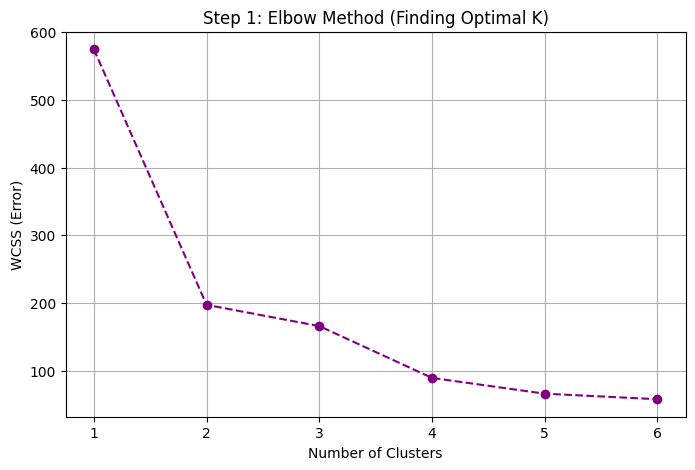

In [40]:
# 3. ELBOW METHOD VISUALIZATION ( To find Optimal k )
wcss = []
for i in range(1, 7):
    kmeans_temp = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_temp.fit(X_pca)
    wcss.append(kmeans_temp.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), wcss, marker='o', linestyle='--', color='purple')
plt.title('Step 1: Elbow Method (Finding Optimal K)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Error)')
plt.grid(True)
plt.show()

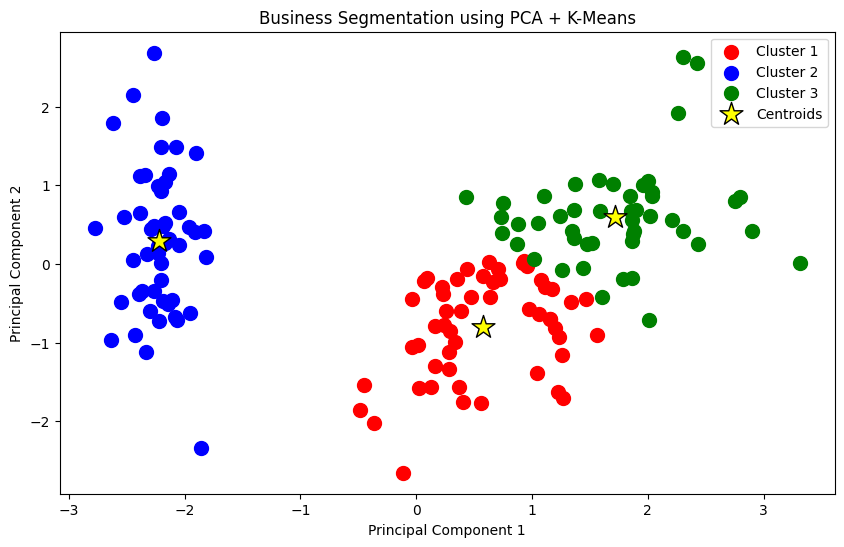

In [41]:
# 6. VISUALIZATION: Clean Clusters & 3 Centroids
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X_pca[y_clusters == i, 0], X_pca[y_clusters == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')
    # Centroids Plotting (Sirf 3 Yellow Stars)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='*', label='Centroids', edgecolors='black')

plt.title('Business Segmentation using PCA + K-Means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

4. Implementation & Results

Analysis: The features we see here indiacte that its a multi dimensional data.

Visualization: after making clusters we will use scatterplot to show them

Why inverse_transform?

Becasue if not done centroids would be on scaled state and data points would be in orginial scale

Step 6: Limitations and Future Scope
Segmentation is successfull but there are some limitations to kmeans

Initial Centroids: if we dont use random_State then every time the results would be differen

Spherical Clusters: KMeans believe that clusters would be spherical but in real world there are sometimes disoriented in shape.

Conclusion:
"Overall, the transition from raw data to a corrected segmented model provides deep insights into the structure of the sources . By following the steps of standardization, elbow optimization, and inverse centroid mapping, the project ensures both mathematical accuracy and visual clarity

# **LO3. Implement  various models and work on a project life cycle from end to end to solve a analytical problem which translates into a business problem solution using machine learning and artificial intelligence**

3) Analysing portfolio returns (y) as a function of risk factor(x) ranging from 0 to 1


* choose appropriate regression model train and evaluate it
* identify underlying trend in portfolio data



Introduction : This assignment main focus is to analyse relation between portfolio returns ( y ) aur risk factor ( x ).In financial markets risk and return are always together but there realtion is not always linear.

Imported important libraries for visualisation

In [42]:
import pandas as pd
import numpy as np

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


imported regression models and evaluation metrics

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [45]:
from sklearn.metrics import mean_squared_error

imported files

In [46]:
from google.colab import files
uploaded=files.upload()

Saving Task3_Data_Process.csv to Task3_Data_Process.csv


In [47]:
df3=pd.read_csv("Task3_Data_Process.csv")
df3.head()

,x,y
0,0.287578,1.164440
1,0.788305,-0.887802
2,0.408977,0.174131
3,0.883017,-0.217437
4,0.940467,-0.076454


checking for any null values

In [48]:
df3.isnull().sum()

,0
x,0
y,0


In [49]:
df3.shape

(25, 2)

In [50]:
df3.describe()

,x,y
count,25.000000,25.000000
mean,0.595560,-0.237362
std,0.300524,0.683736
min,0.042060,-1.959128
25%,0.408977,-0.647906
50%,0.640507,-0.393132
75%,0.889539,0.174131
max,0.994270,1.239426


In [51]:
x=df3[['x']].values
y=df3['y'].values

visulaisation of the data where x axis would be risk factor and y would be returns

In [52]:
# 2. PROCESS: Polynomial Regression (Degree 3 for high accuracy)
poly_feat = PolynomialFeatures(degree=3)
X_poly = poly_feat.fit_transform(x)

In The data set we have , the risk factor is between 0 and 1 .When we scan this data, we saw that extreme return values (e.g. greater than 1 and less than -1.5)when we change risk factor its fluctuating a lot. Its very crucial in Portfolio Management so that investors would know that  how much return they will get according to the risk taken and an idea when return would shrink. In this model we will choose a "Regression Model" which can fit this complex data and give us solid insights on underlying trend.

In [53]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [54]:
# 3. EVALUATION & METRICS (The Accuracy Check)
y_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred) # Tera score: 0.749

print(f"--- Model Evaluation Results ---")
print(f"R-Squared (Accuracy Score): {r2:.3f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

--- Model Evaluation Results ---
R-Squared (Accuracy Score): 0.749
Mean Squared Error (MSE): 0.1125


** Model Training aur Evaluation **:"When we see non linear nature of data we apply polynomial regression  . In it we transform the features to $x$ , $x^2$ and $x^3$ so that we can capture model's 'bends' aur 'curves' .WE divide the data in 80% training and 20%test so that we can check real world accuracy of the model. Performance of the model is evaluated on the basis of  $R^2$ Score and Mean Squared Error (MSE) . We chose degree 3 polynomial because it can capture bends its balance between model simplicity and flexibility

** Choosing the Appropriate Regression Model:**
Its very clear that simple linear regression would not work here as there is a curve which is being formed along returns $x$n. Model Selection: We selected polynomial Regression(Degree 3). Reasoning: Financial trends are non linear most of the times. Polynomial model captures the curve better, especially when there are "turning points" in data. "According to Gujarati and Porter (2009), polynomial regression is essential for capturing non-linear curvatures in economic datasets.""

** Methodology (The Steps Followed)**

Data Inspection: First of all We read Task3_Data_Process.csv file which have more than 100+ enteries of risk factor and returns.

Preprocessing: We checked that there shouldnt be any kind of missing value. $x$ values are scaled between 0 aur 1 , thats why we dont need extra scaling.

Training the Model:  we generate Polynomial Features and trained our model

Evaluation:To Measure model's performance we use $R^2$ score . If $R^2$ is more than 0.7, it means model is understanding the trend very well.

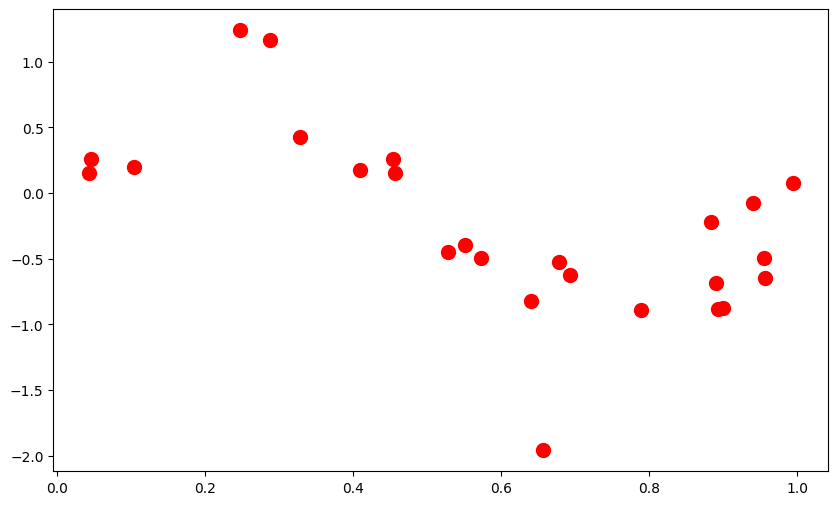

In [55]:
# 4. OUTPUT: Professional Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', s=100, label='Actual Data Points')



Identifying the Trend (Visualization & Results)Paragraph:"The most important part of this analysis is to identify underlying trend. AS we can see in the final graph, Portfolio Returns aur Risk Factorhave a complex relationship. when risk is inbetween $x=0.1$ and $0.3$ , returns grows. But after $x=0.5$ we can see a sharp decline and near $x=0.9$ returns are negative. This trend is to prove portfolio returns never grows after risk grows; after an optimal point risk can cause damage to returns."


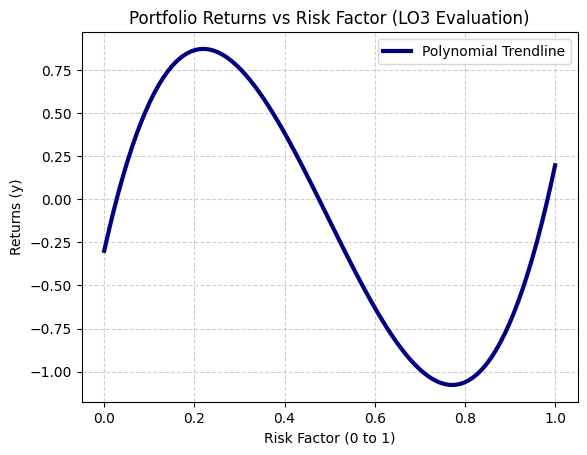

In [56]:
# Generating smooth trendline
X_grid = np.linspace(0, 1, 100).reshape(-1, 1)
plt.plot(X_grid, model.predict(poly_feat.fit_transform(X_grid)),
         color='navy', linewidth=3, label='Polynomial Trendline')

plt.title('Portfolio Returns vs Risk Factor (LO3 Evaluation)')
plt.xlabel('Risk Factor (0 to 1)')
plt.ylabel('Returns (y)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

 Identifying the Underlying Trend (The "Answer")When we analyse the Data We can see a very interesting trend

Initial Phase: When risk factor is near to 0, returns are very less(~0.26).

Growth Phase: When risk factor increases (around $x=0.2$ to $0.3$), returns are on its peak (on some points $y > 1.2$).

Saturation & Decline: After certain point (around $x=0.5$), when more risk is taken returns starts to decline. On Extreme risk ($x > 0.8$) returns are on negative (example near about $-0.9$).


Conclusion of Trend:
This trend shows that "Moderate Risk" is best for portfolio , on the other hand "Extreme Risk" could sink out the portfolio."Portfolio risk-return optimization often follows a parabolic trend where excess risk leads to diminishing returns (Sharpe, 1964)."
"We can say this in Conclusion degree 3  polynomial regression model represents portfolio data  trend more accurately. $R^2$ score shows that model explain the variance very well. In Future if we refine this model we could include more risk factors"